In [20]:
import gzip
import pickle
import os
import numpy as np

In [21]:
data_dir_nums = list(range(24))

common_path = os.path.join(os.getcwd(), 's_a_sprime_visible_claw_')
data_dir_paths = [
    common_path + f'{n}'
    for n in data_dir_nums
]

In [22]:
aggregated = None

for path in data_dir_paths:
    print(path)
    with gzip.open(os.path.join(path, 'data.pkl'), 'rb') as f:
        data = pickle.load(f)
    if aggregated is None:
        aggregated = data
    else:
        aggregated += data
    

/home/justinvyu/dev/softlearning-vice/goal_classifier/s_a_sprime_visible_claw_0
/home/justinvyu/dev/softlearning-vice/goal_classifier/s_a_sprime_visible_claw_1
/home/justinvyu/dev/softlearning-vice/goal_classifier/s_a_sprime_visible_claw_2
/home/justinvyu/dev/softlearning-vice/goal_classifier/s_a_sprime_visible_claw_3
/home/justinvyu/dev/softlearning-vice/goal_classifier/s_a_sprime_visible_claw_4
/home/justinvyu/dev/softlearning-vice/goal_classifier/s_a_sprime_visible_claw_5
/home/justinvyu/dev/softlearning-vice/goal_classifier/s_a_sprime_visible_claw_6
/home/justinvyu/dev/softlearning-vice/goal_classifier/s_a_sprime_visible_claw_7
/home/justinvyu/dev/softlearning-vice/goal_classifier/s_a_sprime_visible_claw_8
/home/justinvyu/dev/softlearning-vice/goal_classifier/s_a_sprime_visible_claw_9
/home/justinvyu/dev/softlearning-vice/goal_classifier/s_a_sprime_visible_claw_10
/home/justinvyu/dev/softlearning-vice/goal_classifier/s_a_sprime_visible_claw_11
/home/justinvyu/dev/softlearning-vice/

In [23]:
len(aggregated)

23000

In [24]:
def combine_dicts(dicts):
    combined = {k: [] for k in dicts[0].keys()}
    for d in dicts:
        for k in d:
            combined[k].append(d[k])
            
    for k in combined:
        combined[k] = np.stack(combined[k])
    return combined

combined = combine_dicts(aggregated)

In [25]:
combined.keys()

dict_keys(['actions', 'states', 'claw_qpos', 'pixels'])

In [26]:
combined['pixels'].shape

(23000, 32, 32, 32, 3)

In [27]:
with gzip.open(common_path[:-1] + '.pkl', 'wb') as f:
    pickle.dump(combined, f)

In [45]:
images_stacked = combined['pixels'].reshape((-1, 32, 32, 3))
states_stacked = combined['states'].reshape((-1, 4))
claw_stacked = combined['claw_qpos'].reshape((-1, 9))
last_action_stacked = combined['last_action'].reshape((-1, 9))

KeyError: 'last_action'

In [46]:
actions_stacked = combined['actions'].reshape((-1, 9))

In [52]:
actions_stacked[735999:].shape

(1, 9)

In [63]:
indices = np.arange(0, actions_stacked.shape[0], step=32)

In [64]:
indices

array([     0,     32,     64, ..., 735904, 735936, 735968])

In [58]:
last_actions = actions_stacked.copy()
last_actions[1:] = last_actions[:-1]

In [65]:
last_actions[indices] = 0.

In [71]:
claw_stacked.shape

(736000, 9)

In [72]:
dump_dict = {
    'pixels': images_stacked,
    'states': states_stacked,
    'claw_qpos': claw_stacked,
    'last_action': last_actions,
}

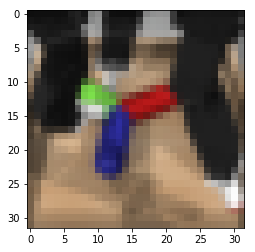

In [41]:
plt.imshow(images_stacked[5000])

In [73]:
with gzip.open('./vae_visible_claw_data.pkl', 'wb') as f:
    pickle.dump(dump_dict, f)